```{image} ../images/logos/Xarray_Logo_RGB_Final.png
:width: 250px
:align: center
```

# Introducción a Xarray
---

`Xarray` es una librería de Python diseñada para facilitar el análisis y manipulación de **datos multidimensionales etiquetados** (como los que provienen de modelos climáticos, observaciones satelitales o simulaciones numéricas).

Inspirado en la estructura de `Pandas`, `Xarray` extiende su funcionalidad a arreglos N-dimensionales, permitiendo trabajar de forma intuitiva con datos que tienen múltiples coordenadas como **tiempo**, **latitud** y **longitud**.

> Xarray es especialmente popular en ciencias de la Tierra y del clima, donde los datos suelen venir en formatos como **NetCDF**, **Zarr** o **GRIB**.


## 📚 Descripción general

Al completar este cuadernillo serás capaz de:

- Comprender qué son `DataArray` y `Dataset`
- Crear objetos Xarray desde arreglos de NumPy
- Asignar dimensiones y coordenadas
- Explorar y seleccionar datos usando coordenadas
- Calcular estadísticas y aplicar operaciones
- Visualizar datos con `.plot()`
- Leer datos reales desde archivos NetCDF


## ✅ Requisitos previos

| Concepto | Importancia | Notas |
| --- | --- | --- |
| [Introducción a NumPy](./1.2.Introduccion-Numpy.ipynb) | Necesario | Arreglos multidimensionales |
| [Fundamentos de Pandas](./1.3.Introduccion-Pandas.ipynb) | Necesario | Indexado y manipulación tabular |
| [Uso de JupyterLab](./1.0.Introduccion-JupyterLab.ipynb) | Útil | Navegación entre celdas |

⏱️ **Tiempo estimado de aprendizaje**: 
- Lectura y ejecución: 30-40 minutos
- Con actividades de práctica: 60-90 minutos

✍️ **Formato**: interactivo, ejecuta y modifica el código a medida que avanzas

## 1. Primeros pasos con Xarray 🧪
---

La unidad básica en Xarray es el **`DataArray`**, que extiende la funcionalidad de los `ndarray` de NumPy. A diferencia de NumPy, Xarray permite asignar:- **Dimensiones con nombre** (`time`, `lat`, `lon`, etc.)- **Coordenadas** con etiquetas asociadas- **Atributos** descriptivos como unidades, nombre estándar, etc.Esta herramienta es particularmente poderosa cuando se trabaja con datos atmosféricos, oceanográficos o climáticos provenientes de modelos numéricos o sensores remotos, donde las variables dependen del tiempo, la latitud, la longitud y a veces también de la altitud.Importemos las librerías necesarias para este cuadernillo

## Importar librerías

In [1]:
import xarray as xr
import numpy as np
import pandas as pd

### 🎛️ 1.1. Crear un `DataArray` desde NumPy

Para comenzar, creamos una matriz tridimensional con valores simulados de temperatura (en grados Kelvin). Esta matriz tendrá dimensiones que representan el tiempo, la latitud y la longitud:


In [2]:
data = 283 + 5 * np.random.randn(5, 3, 4)  # 5 tiempos, 3 latitudes, 4 longitudes
data.shape

(5, 3, 4)

Podemos construir un `DataArray` inicial directamente desde este arreglo de NumPy, aunque sin información adicional aún:

In [3]:
temp = xr.DataArray(data)
temp

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)> Size: 480B
array([[[286.84872426, 276.48122547, 279.13305869, 273.11358278],
        [278.29855752, 282.18903224, 285.97719679, 299.15206349],
        [283.56733008, 275.80175533, 274.00320171, 286.69040543]],

       [[292.35068975, 274.79956562, 284.93616771, 279.85990211],
        [277.83663053, 285.46308111, 284.45568422, 281.97609952],
        [283.38836918, 280.84524095, 286.44706933, 283.29001738]],

       [[282.91360013, 279.8245143 , 286.60434418, 283.54821995],
        [286.06473223, 276.08197012, 275.16391235, 284.50536564],
        [280.80480726, 288.17901101, 278.00786784, 289.62768492]],

       [[286.29550411, 283.70713723, 277.97167792, 289.76831411],
        [285.03759795, 288.17595825, 281.98542991, 285.08327674],
        [285.03698055, 271.08637192, 281.99254646, 280.74871425]],

       [[280.59055336, 284.67612931, 273.16447847, 283.05687883],
        [278.53797589, 276.63591237, 279.22610589, 280.23773501],
        [284.87816075, 285.45748297, 287.02169319, 284.86475557]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

⚠️ Como no definimos nombres para las dimensiones, Xarray usa nombres genéricos como `dim_0`, `dim_1`, `dim_2`, lo cual puede dificultar la interpretación de los datos.

### 1.2 Asignar nombres de dimensiones 📀

Para mejorar la legibilidad, asignamos nombres explícitos a las dimensiones. Esto convierte un arreglo anónimo en un conjunto de datos más descriptivo y navegable:

In [4]:
temp = xr.DataArray(data, dims=["time", "lat", "lon"])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[286.84872426, 276.48122547, 279.13305869, 273.11358278],
        [278.29855752, 282.18903224, 285.97719679, 299.15206349],
        [283.56733008, 275.80175533, 274.00320171, 286.69040543]],

       [[292.35068975, 274.79956562, 284.93616771, 279.85990211],
        [277.83663053, 285.46308111, 284.45568422, 281.97609952],
        [283.38836918, 280.84524095, 286.44706933, 283.29001738]],

       [[282.91360013, 279.8245143 , 286.60434418, 283.54821995],
        [286.06473223, 276.08197012, 275.16391235, 284.50536564],
        [280.80480726, 288.17901101, 278.00786784, 289.62768492]],

       [[286.29550411, 283.70713723, 277.97167792, 289.76831411],
        [285.03759795, 288.17595825, 281.98542991, 285.08327674],
        [285.03698055, 271.08637192, 281.99254646, 280.74871425]],

       [[280.59055336, 284.67612931, 273.16447847, 283.05687883],
        [278.53797589, 276.63591237, 279.22610589, 280.23773501],
        [284.87816075, 285.45748297, 287.02169319, 284.86475557]]])
Dimensions without coordinates: time, lat, lon

Creamos un objeto con datos y dimensiones que gráficamente se podría representar de la siguiente manera:

<img src="../images/datarray.png" width=600 alt="Datarray"></img> 

Esto nos permite realizar operaciones sobre dimensiones por nombre, en lugar de índices numéricos.

### 1.3 Agregar coordenadas a las dimensiones 🗺️

Además de los nombres, podemos asociar coordenadas reales que representen valores geográficos o temporales. Esto permite, por ejemplo, ubicar espacialmente los datos o hacer filtrados temporales:

In [5]:
times = pd.date_range("2018-01-01", periods=5)
lats = np.linspace(25, 55, 3)
lons = np.linspace(-120, -90, 4)

Construimos nuevamente el `DataArray`, esta vez incluyendo coordenadas:

In [6]:
temp = xr.DataArray(data, coords=[times, lats, lons], dims=["time", "lat", "lon"])
temp

<xarray.DataArray (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[286.84872426, 276.48122547, 279.13305869, 273.11358278],
        [278.29855752, 282.18903224, 285.97719679, 299.15206349],
        [283.56733008, 275.80175533, 274.00320171, 286.69040543]],

       [[292.35068975, 274.79956562, 284.93616771, 279.85990211],
        [277.83663053, 285.46308111, 284.45568422, 281.97609952],
        [283.38836918, 280.84524095, 286.44706933, 283.29001738]],

       [[282.91360013, 279.8245143 , 286.60434418, 283.54821995],
        [286.06473223, 276.08197012, 275.16391235, 284.50536564],
        [280.80480726, 288.17901101, 278.00786784, 289.62768492]],

       [[286.29550411, 283.70713723, 277.97167792, 289.76831411],
        [285.03759795, 288.17595825, 281.98542991, 285.08327674],
        [285.03698055, 271.08637192, 281.99254646, 280.74871425]],

       [[280.59055336, 284.67612931, 273.16447847, 283.05687883],
        [278.53797589, 276.63591237, 279.22610589, 280.23773501],
        [284.87816075, 285.45748297, 287.02169319, 284.86475557]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

Con esto obtenemos un objeto con visualización enriquecida: las dimensiones están etiquetadas y cada punto tiene una referencia espacial y temporal clara.

<img src="../images/datarray_coords.png" width=600 alt="Datarray_Coords"></img> 

### 1.4 Agregar atributos descriptivos 🏷️

Finalmente, Xarray permite incluir metadatos como unidades físicas, nombres estándar de variables o descripciones adicionales. Esto es importante para la trazabilidad y para facilitar el trabajo colaborativo o la publicación de datos:


In [7]:
temp.attrs["units"] = "K"
temp.attrs["standard_name"] = "air_temperature"

Estos atributos no alteran los datos, pero se usan al exportar, graficar o convertir los objetos a otros formatos como NetCDF. También ayudan a los usuarios a entender rápidamente qué representa el conjunto de datos.

## 2. Dataset: Contenedor multidimensional 🧳
---
Mientras que un `DataArray` representa una sola variable con sus dimensiones y coordenadas, un `Dataset` es un **contenedor que puede almacenar múltiples `DataArray`s**, que posiblemente compartan dimensiones y coordenadas.

Esto es muy útil en ciencias ambientales, donde queremos trabajar simultáneamente con variables como temperatura, presión, humedad, etc., dentro de un mismo archivo o conjunto de datos.


### 2.1 Crear múltiples DataArrays 🌡️

Partimos de los `DataArray`s que representan distintas variables físicas como temperatura del aire, presión atmosférica y humedad relativa:


In [8]:
# Temperatura
temp = xr.DataArray(
    data=283 + 5 * np.random.randn(5, 3, 4),
    coords={"time": times, "lat": lats, "lon": lons},
    dims=["time", "lat", "lon"],
    name="Temperature",
    attrs={"units": "K", "standard_name": "air_temperature"}
)

# Presión
pressure = xr.DataArray(
    data=1000 + 10 * np.random.randn(5, 3, 4),
    coords={"time": times, "lat": lats, "lon": lons},
    dims=["time", "lat", "lon"],
    name="Pressure",
    attrs={"units": "hPa", "standard_name": "air_pressure"}
)

# Humedad relativa
hr = xr.DataArray(
    data=np.random.uniform(60, 100, size=5),
    coords={"time": times},
    dims=["time"],
    name="RelativeHumidity",
    attrs={"units": "%", "standard_name": "relative_humidity"}
)

### 2.2 Crear el Dataset 📦

Una vez definidos los `DataArray`s, podemos crear un `Dataset` pasando un diccionario con las variables:

In [9]:
ds = xr.Dataset(
    data_vars={
        "Temperature": temp,
        "Pressure": pressure,
        "RelativeHumidity": hr
    }
)

En un entorno interactivo como JupyterLab, este `Dataset` se mostrará como un menú desplegable que incluye:- Dimensiones (`dims`)- Coordenadas (`coords`)- Variables (`data_vars`)- índices (`indexes`)- Atributos (`attrs`)

In [10]:
ds

<xarray.Dataset> Size: 1kB
Dimensions:           (time: 5, lat: 3, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 40B 2018-01-01 ... 2018-01-05
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 480B 288.7 286.1 ... 295.5 283.8
    Pressure          (time, lat, lon) float64 480B 999.1 1.002e+03 ... 997.1
    RelativeHumidity  (time) float64 40B 77.74 74.3 88.45 97.08 60.34

La visualización del `Dataset` mostrará las dimensiones compartidas, las coordenadas y un resumen de cada variable contenida como se muestra en la siguiente imagen tomada de la documentación de `xarray`

<img src="../images/xarray-datastructure.png" width=800 alt="Dataset"></img> 

Esto permite acceder rápidamente a las dimensiones comunes y explorar todas las variables de forma estructurada.


## 3. Selección de datos y operaciones básicas 🧩
---
Una vez que tenemos nuestros datos organizados en `DataArray` o `Dataset`, Xarray nos permite acceder, filtrar y operar sobre ellos de forma muy intuitiva utilizando etiquetas en lugar de índices numéricos.


### 3.1 Acceder a variables en un Dataset 🔎

Cada variable contenida dentro de un `Dataset` es un `DataArray`, y se puede acceder de manera sencilla usando notación por atributo `ds.<atributo>` (acceso directo si el nombre es válido) 

In [11]:
ds.Temperature

<xarray.DataArray 'Temperature' (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[288.67486071, 286.06886844, 283.44700276, 276.82207665],
        [288.68418176, 281.36253925, 286.06421186, 280.45408045],
        [294.99202498, 280.89729861, 283.15379419, 281.2670062 ]],

       [[289.02227549, 290.24938865, 286.97726682, 283.68325849],
        [284.63295248, 287.31400428, 283.56888479, 280.87089086],
        [277.47650944, 283.28888087, 283.87564447, 299.91892322]],

       [[280.68467533, 279.5432119 , 274.04027477, 283.43442024],
        [295.70686966, 291.24490378, 280.06123476, 289.06094229],
        [281.4900006 , 284.48366987, 280.94649922, 281.63615264]],

       [[287.13264701, 279.32913153, 279.17713165, 283.10307481],
        [276.21777853, 280.703828  , 281.52993608, 279.6273213 ],
        [277.88973458, 286.53415515, 292.40731685, 278.68996834]],

       [[278.46818655, 295.8871862 , 279.75059056, 282.50480696],
        [277.05415162, 287.86653566, 286.49869941, 290.96266266],
        [281.42707836, 278.09099914, 295.54409145, 283.8278978 ]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Attributes:
    units:          K
    standard_name:  air_temperature

O Notación por clave de diccionario (más general y flexible)

In [12]:
ds["Pressure"]

<xarray.DataArray 'Pressure' (time: 5, lat: 3, lon: 4)> Size: 480B
array([[[ 999.05250252, 1002.15248843, 1018.2725676 , 1005.06587908],
        [ 995.36753556, 1004.06783708, 1017.49018238,  988.78762032],
        [ 966.91899085,  994.25343559, 1007.72111766,  980.91250491]],

       [[1008.85049471,  999.03606209,  990.23866438, 1005.47014625],
        [1010.60190555, 1007.39552599,  977.34221965, 1000.04986441],
        [1010.15871151,  992.03678101, 1001.47935327,  986.63563217]],

       [[1008.95905459,  974.06443741,  993.23872053, 1012.86704646],
        [ 990.25368599,  983.08692326, 1007.80658864, 1007.30177074],
        [1008.13844381,  997.92562183,  996.71680553, 1007.50055418]],

       [[ 999.24643312, 1003.59408087, 1011.8513481 , 1022.33773158],
        [ 988.72840206, 1000.57197484,  993.55245822, 1016.23344633],
        [ 999.03925023,  993.74079581, 1000.86777175, 1007.5448267 ]],

       [[1007.69649144, 1001.17334219,  993.39977815, 1005.64020874],
        [ 994.11635698,  983.95937436,  979.16026209,  998.04257419],
        [1000.69046981, 1017.33955546, 1006.78049958,  997.09913017]]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Attributes:
    units:          hPa
    standard_name:  air_pressure

Ambas formas retornan el `DataArray` correspondiente. La primera es más compacta, útil en notebooks interactivos; la segunda es más robusta, especialmente si los nombres contienen espacios, guiones u otros caracteres especiales.


### 3.2 Seleccionar datos por coordenadas con `.sel()` 🧭

El método `.sel()` permite seleccionar subconjuntos de datos utilizando los **valores de las coordenadas** en lugar de los índices posicionales. Esto hace que el código sea más legible y expresivo.


Por ejemplo, podemos seleccionar todos los datos para una fecha específica


In [13]:
ds.sel(time="2018-01-01")

<xarray.Dataset> Size: 264B
Dimensions:           (lat: 3, lon: 4)
Coordinates:
    time              datetime64[ns] 8B 2018-01-01
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (lat, lon) float64 96B 288.7 286.1 283.4 ... 283.2 281.3
    Pressure          (lat, lon) float64 96B 999.1 1.002e+03 ... 1.008e+03 980.9
    RelativeHumidity  float64 8B 77.74

O seleccionar una variable y una ubicación específica

In [14]:
ds.Temperature.sel(time="2018-01-01", lat=25, lon=-120)

<xarray.DataArray 'Temperature' ()> Size: 8B
array(288.67486071)
Coordinates:
    time     datetime64[ns] 8B 2018-01-01
    lat      float64 8B 25.0
    lon      float64 8B -120.0
Attributes:
    units:          K
    standard_name:  air_temperature


✅ Muy útil y conveniente cuando trabajamos con fechas o ubicaciones reales.

### 3.3 Seleccionar datos por posición con `.isel()` 🔹

Si en cambio queremos seleccionar por posición (como con NumPy), usamos `.isel()`. Esto es útil cuando no conocemos las coordenadas exactas o estamos en procesos de automatización.


In [15]:
# Seleccionar el primer tiempo (posición 0)
ds.isel(time=0)

<xarray.Dataset> Size: 264B
Dimensions:           (lat: 3, lon: 4)
Coordinates:
    time              datetime64[ns] 8B 2018-01-01
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (lat, lon) float64 96B 288.7 286.1 283.4 ... 283.2 281.3
    Pressure          (lat, lon) float64 96B 999.1 1.002e+03 ... 1.008e+03 980.9
    RelativeHumidity  float64 8B 77.74

Seleccionar temperatura para la primera posición de latitud y segunda longitud a lo largo del tiempo

In [16]:
ds.Temperature.isel(lat=0, lon=1)

<xarray.DataArray 'Temperature' (time: 5)> Size: 40B
array([286.06886844, 290.24938865, 279.5432119 , 279.32913153,
       295.8871862 ])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
    lat      float64 8B 25.0
    lon      float64 8B -110.0
Attributes:
    units:          K
    standard_name:  air_temperature

🧠 `.isel()` usa números de posición; `.sel()` usa etiquetas de coordenadas.

### 3.4 Seleccionar rangos con `slice()` 🪄

Podemos seleccionar rangos utilizando `slice()`, lo que facilita el trabajo con subconjuntos:


Por ejemplo seleccionemos el subconjunto de datos entre dos fechas

In [17]:
ds.sel(time=slice("2018-01-01", "2018-01-03"))

<xarray.Dataset> Size: 680B
Dimensions:           (time: 3, lat: 3, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 24B 2018-01-01 2018-01-02 2018-01-03
  * lat               (lat) float64 24B 25.0 40.0 55.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 288B 288.7 286.1 ... 280.9 281.6
    Pressure          (time, lat, lon) float64 288B 999.1 ... 1.008e+03
    RelativeHumidity  (time) float64 24B 77.74 74.3 88.45

O subconjunto de latitudes

In [18]:
ds.sel(lat=slice(30, 50))

<xarray.Dataset> Size: 440B
Dimensions:           (time: 5, lat: 1, lon: 4)
Coordinates:
  * time              (time) datetime64[ns] 40B 2018-01-01 ... 2018-01-05
  * lat               (lat) float64 8B 40.0
  * lon               (lon) float64 32B -120.0 -110.0 -100.0 -90.0
Data variables:
    Temperature       (time, lat, lon) float64 160B 288.7 281.4 ... 286.5 291.0
    Pressure          (time, lat, lon) float64 160B 995.4 1.004e+03 ... 998.0
    RelativeHumidity  (time) float64 40B 77.74 74.3 88.45 97.08 60.34

Esto es especialmente útil en análisis temporales o espaciales que requieren ventanas móviles.

## 4. Operaciones estadísticas y gráficas 📊
---
Una de las grandes ventajas de Xarray es que permite aplicar operaciones estadísticas y crear visualizaciones de forma muy similar a Pandas, pero extendidas a múltiples dimensiones.

### 4.1 Estadísticas sobre dimensiones 📐

Podemos calcular estadísticas como la media, desviación estándar, máximo o mínimo a lo largo de una o varias dimensiones.


In [19]:
# Media de temperatura a lo largo del tiempo
ds.Temperature.mean(dim="time")

<xarray.DataArray 'Temperature' (lat: 3, lon: 4)> Size: 96B
array([[284.79652902, 286.21555734, 280.67845331, 281.90952743],
       [284.45918681, 285.6983622 , 283.54459338, 284.19517951],
       [282.65506959, 282.65900073, 287.18546924, 285.06798964]])
Coordinates:
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

In [20]:
# Mínimo de presión sobre latitudes
ds.Pressure.min(dim="lat")

<xarray.DataArray 'Pressure' (time: 5, lon: 4)> Size: 160B
array([[ 966.91899085,  994.25343559, 1007.72111766,  980.91250491],
       [1008.85049471,  992.03678101,  977.34221965,  986.63563217],
       [ 990.25368599,  974.06443741,  993.23872053, 1007.30177074],
       [ 988.72840206,  993.74079581,  993.55245822, 1007.5448267 ],
       [ 994.11635698,  983.95937436,  979.16026209,  997.09913017]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

In [21]:
# Desviación estándar de humedad relativa
ds.RelativeHumidity.std(dim="time")

<xarray.DataArray 'RelativeHumidity' ()> Size: 8B
array(12.54196044)

✅ Estas funciones son muy útiles para obtener resúmenes climatológicos o patrones promedios.


4.2 Interpolación de datos 🌐
Cuando necesitas obtener valores en coordenadas que no existen exactamente en tus datos, puedes usar `.interp()` para interpolar:

In [22]:
# Interpolación espacial
valor_interp = ds.Temperature.interp(lat=33.5, lon=-110)
valor_interp

<xarray.DataArray 'Temperature' (time: 5)> Size: 40B
array([283.40194856, 288.58600418, 286.17417063, 280.1081262 ,
       291.34215089])
Coordinates:
  * time     (time) datetime64[ns] 40B 2018-01-01 2018-01-02 ... 2018-01-05
    lat      float64 8B 33.5
    lon      int64 8B -110
Attributes:
    units:          K
    standard_name:  air_temperature

📌 Puedes especificar el método de interpolación (como linear, nearest) y ajustar la tolerancia.

### 4.3 Visualizaciones rápidas con `.plot()` 🖼️

Xarray incluye integración con Matplotlib para hacer gráficos rápidos desde cualquier `DataArray`:

Generemos una serie temporal de temperatura en una ubicación determinada

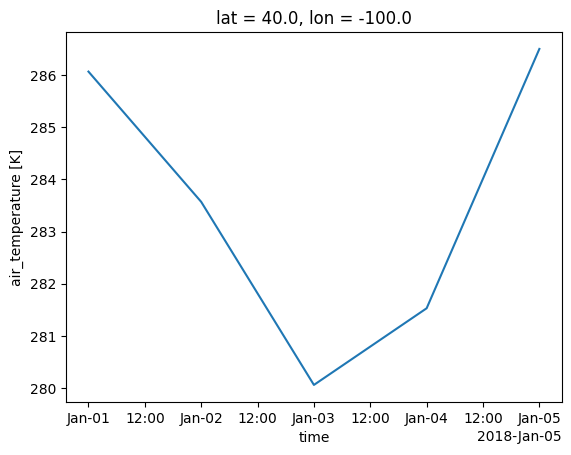

In [23]:
serie = ds.Temperature.sel(lat=40, lon=-100, method="nearest")
serie.plot()

O un mapa de temperatura para t=0

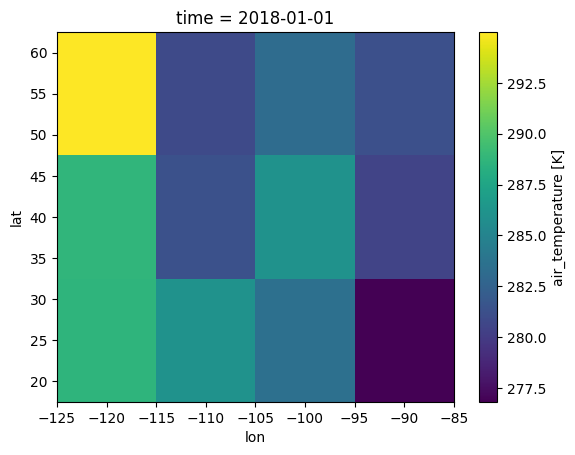

In [24]:
mapa = ds.Temperature.isel(time=0)
mapa.plot()

O un Mapa de temperatura promedio

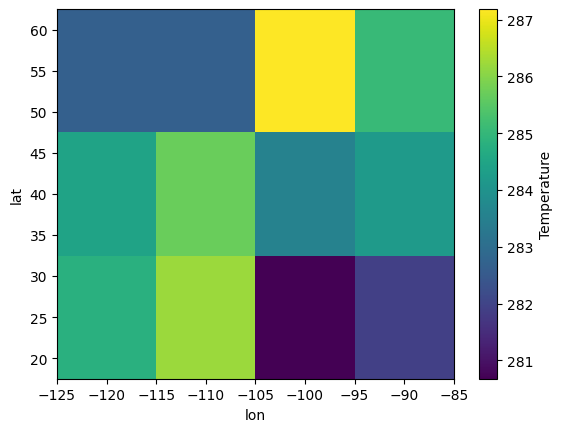

In [25]:
prom_mapa = ds.Temperature.mean("time")
prom_mapa.plot()

🔍 Estas funciones detectan automáticamente si el resultado es 1D o 2D y generan una línea o un mapa respectivamente.


### 4.4 Aplicar máscaras y condiciones 🎭

Puedes aplicar filtros condicionales a los datos usando `.where()`, muy útil para enmascarar regiones o aplicar umbrales:


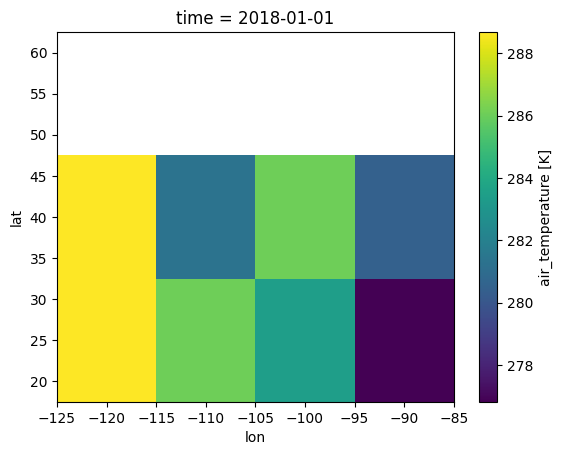

In [26]:
# Mostrar datos para latitudes menores a 50 grados
ds.Temperature.where(ds.lat < 50).isel(time=0).plot()

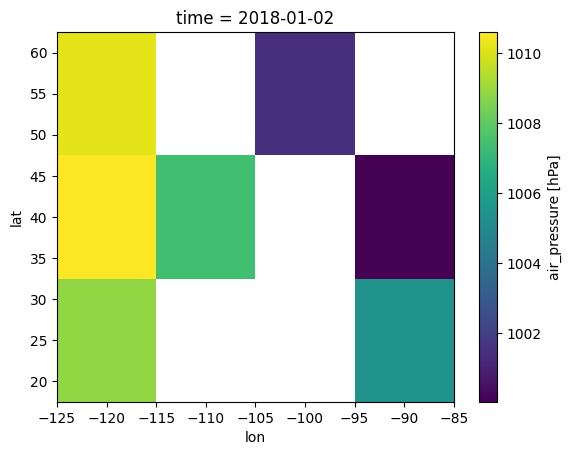

In [27]:
# Filtrar valores de presión mayores a cierto umbral
ds.Pressure.where(ds.Pressure > 1000).isel(time=1).plot()

🧪 `.where()` mantiene la forma del arreglo pero oculta los datos que no cumplen la condición.

### 4.5 Agrupación temporal con `groupby()` 📅

Xarray permite agrupar datos por coordenadas temporales para crear climatologías o calcular promedios estacionales usando `.groupby()`:


In [28]:
# Crear datos con más tiempos para demostrar groupby
times_extended = pd.date_range('2018-01-01', periods=12, freq='M')
temp_extended = xr.DataArray(
    data=283 + 5 * np.random.randn(12, 3, 4),
    coords={'time': times_extended, 'lat': lats, 'lon': lons},
    dims=['time', 'lat', 'lon']
)

# Agrupar por mes y calcular la media
temp_por_mes = temp_extended.groupby('time.month').mean()
temp_por_mes

<xarray.DataArray (month: 12, lat: 3, lon: 4)> Size: 1kB
array([[[285.04732635, 285.12532014, 277.2217391 , 289.97943511],
        [282.75228242, 284.12774567, 285.1380038 , 290.58164316],
        [281.38421672, 278.58350852, 285.60321525, 280.23473587]],

       [[281.42979233, 289.77015995, 282.17114859, 290.92850781],
        [284.04005498, 278.08518745, 290.33046046, 278.01766249],
        [282.62516437, 289.93934482, 275.94602416, 281.95416112]],

       [[277.83845837, 283.86273723, 280.26256714, 282.93265289],
        [279.22374852, 290.70727102, 274.33929434, 278.86312349],
        [286.76863725, 282.92852346, 282.47841207, 282.967986  ]],

       [[293.68621776, 277.09275304, 281.92491726, 294.39345927],
        [287.16320349, 275.12440064, 286.00269953, 275.36062671],
        [289.07451486, 287.07769607, 281.57485181, 281.98006842]],

       [[280.64672018, 287.18750998, 276.33049902, 282.15844959],
        [283.31261733, 276.43034608, 277.46344095, 286.0340395 ],
        [290.76139193, 287.59898144, 286.62301554, 279.61256891]],

...

       [[290.23982011, 284.58527403, 289.15132927, 280.39362411],
        [274.82262677, 283.13331289, 279.40542303, 284.74782737],
        [292.17201798, 278.58475814, 279.2600464 , 293.43277575]],

       [[274.63130262, 280.46338906, 284.19650175, 282.82402624],
        [278.91031204, 282.04517577, 279.35740238, 289.80193037],
        [292.33404747, 278.36337511, 275.42638067, 285.14925422]],

       [[289.35241866, 285.84388899, 279.77942541, 283.56823109],
        [287.69697939, 282.09509738, 290.41102616, 285.59810079],
        [286.31156884, 280.59833218, 288.06689882, 280.76287847]],

       [[285.69610652, 281.84378969, 287.66640909, 278.88050609],
        [282.4872341 , 283.51225561, 281.93434118, 282.91175497],
        [284.94826591, 280.70619499, 286.47303228, 285.21038285]],

       [[285.7847761 , 276.3705917 , 285.47714375, 284.63909403],
        [279.19708295, 280.30025781, 283.34267194, 285.03954694],
        [293.59872262, 284.257028  , 289.23833355, 287.73683683]]])
Coordinates:
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

Este método es especialmente útil para calcular climatologías mensuales o estacionales a partir de series temporales largas.

📊 Puedes agrupar por: `time.month`, `time.season`, `time.year`, `time.dayofyear`, etc.


### 4.6 Operaciones aritméticas y broadcasting ➕

Xarray permite realizar operaciones aritméticas entre `DataArrays`, alineando automáticamente las coordenadas (**broadcasting**):


In [29]:
# Operación simple: sumar dos variables
temp_kelvin = ds.Temperature
temp_celsius = temp_kelvin - 273.15
print(f"Temperatura promedio: {temp_celsius.mean().values:.2f} °C")

Temperatura promedio: 10.94 °C


In [30]:
# Combinar variables: calcular anomalía respecto a la media temporal
temp_mean = ds.Temperature.mean(dim='time')
temp_anomaly = ds.Temperature - temp_mean
temp_anomaly.isel(time=0)

<xarray.DataArray 'Temperature' (lat: 3, lon: 4)> Size: 96B
array([[ 3.87833169, -0.14668891,  2.76854945, -5.08745078],
       [ 4.22499495, -4.33582294,  2.51961848, -3.74109906],
       [12.33695539, -1.76170212, -4.03167504, -3.80098344]])
Coordinates:
    time     datetime64[ns] 8B 2018-01-01
  * lat      (lat) float64 24B 25.0 40.0 55.0
  * lon      (lon) float64 32B -120.0 -110.0 -100.0 -90.0

✨ Xarray alinea automáticamente las dimensiones, facilitando operaciones complejas sin necesidad de reindexar manualmente.


---

## 5. ✏️ Actividades de práctica

Ahora que has aprendido los conceptos fundamentales de Xarray, es momento de ponerlos en práctica. Estas actividades te ayudarán a consolidar lo aprendido usando el Dataset `ds` que creamos anteriormente (con variables de Temperatura, Presión y Humedad Relativa).

### Ejercicio 1: Selección de datos

**Objetivo**: Practicar diferentes métodos de selección de datos.

**Tarea**: Usando el Dataset `ds`:
1. Selecciona la temperatura para la fecha '2018-01-03' usando `.sel()`
2. Selecciona la presión para la tercera posición temporal usando `.isel()`
3. Extrae un rango de latitudes entre 30 y 50 grados

In [31]:
# Tu código aquí

````{admonition} Solución
:class: dropdown

```python
# 1. Temperatura para fecha específica
temp_dia3 = ds.Temperature.sel(time='2018-01-03')
print(temp_dia3)

# 2. Presión en tercera posición temporal
presion_t2 = ds.Pressure.isel(time=2)
print(presion_t2)

# 3. Rango de latitudes
datos_region = ds.sel(lat=slice(30, 50))
print(datos_region)
```
````

---

### Ejercicio 2: Operaciones estadísticas

**Objetivo**: Calcular estadísticas sobre diferentes dimensiones.

**Tarea**: 
1. Calcula la temperatura promedio a lo largo del tiempo para cada ubicación espacial
2. Encuentra la presión máxima en cada punto temporal
3. Calcula la desviación estándar de la humedad relativa

In [32]:
# Tu código aquí

````{admonition} Solución
:class: dropdown

```python
# 1. Temperatura promedio en el tiempo
temp_promedio = ds.Temperature.mean(dim='time')
print(temp_promedio)

# 2. Presión máxima por tiempo
presion_max = ds.Pressure.max(dim=['lat', 'lon'])
print(presion_max)

# 3. Desviación estándar de humedad
hr_std = ds.RelativeHumidity.std()
print(f"Desviación estándar HR: {hr_std.values:.2f}%")
```
````

---

### Ejercicio 3: Aplicación de máscaras

**Objetivo**: Filtrar datos usando condiciones.

**Tarea**:
1. Crea una máscara que muestre solo temperaturas mayores a 285 K
2. Filtra la presión para mostrar solo valores menores a 995 hPa
3. Visualiza el resultado con `.plot()`

In [33]:
# Tu código aquí

````{admonition} Solución
:class: dropdown

```python
# 1. Máscara de temperatura
temp_alta = ds.Temperature.where(ds.Temperature > 285)
print(temp_alta.isel(time=0))

# 2. Presión baja
presion_baja = ds.Pressure.where(ds.Pressure < 995)
print(presion_baja.isel(time=0))

# 3. Visualización
temp_alta.isel(time=0).plot()
```
````

---

### Ejercicio 4: Combinando operaciones

**Objetivo**: Integrar múltiples operaciones en un análisis completo.

**Tarea**:
1. Selecciona datos solo para las dos primeras fechas usando `slice()`
2. Calcula la temperatura promedio espacial (sobre lat y lon) para esas fechas
3. Grafica la serie temporal resultante

In [34]:
# Tu código aquí

````{admonition} Solución
:class: dropdown

```python
# 1 y 2. Selección y promedio espacial
temp_subset = ds.Temperature.sel(time=slice('2018-01-01', '2018-01-02'))
temp_promedio_espacial = temp_subset.mean(dim=['lat', 'lon'])

# 3. Visualización
temp_promedio_espacial.plot(marker='o')
import matplotlib.pyplot as plt
plt.title('Temperatura promedio espacial')
plt.ylabel('Temperatura (K)')
plt.grid(True)
```
````

````{admonition} Checkpoint ✅
:class: success

¡Excelente trabajo! Has completado las actividades de práctica de Xarray. Ahora tienes las habilidades fundamentales para:
- Seleccionar datos por coordenadas y posición
- Calcular estadísticas sobre dimensiones específicas
- Aplicar filtros y máscaras a tus datos
- Combinar múltiples operaciones para análisis complejos

Estas son las bases que necesitarás para trabajar con datos reales en las siguientes secciones del curso.
````

---

## ✅ Conclusiones

En este cuadernillo aprendiste los fundamentos del manejo de datos multidimensionales con **Xarray**, una herramienta esencial en la ciencia del clima, meteorología y disciplinas relacionadas con datos ambientales.

🔑 **Lo más destacado**:

- Comprendiste la diferencia entre `DataArray` y `Dataset`, dos estructuras clave para manejar datos con múltiples dimensiones y coordenadas.
- Aprendiste a **etiquetar** tus datos con dimensiones y coordenadas que hacen tu análisis más claro y reproducible.
- Aplicaste operaciones estadísticas como `mean()`, `std()` o `sum()` a lo largo de diferentes dimensiones.
- Usaste `.sel()` y `.isel()` para extraer datos fácilmente con etiquetas o índices.
- Generaste visualizaciones rápidas usando `.plot()` para explorar tendencias temporales y mapas espaciales.

📦 Con este conocimiento ya puedes comenzar a trabajar con grandes volúmenes de datos científicos como modelos climáticos, observaciones satelitales o reanálisis atmosféricos.

---

## 📚 Recursos recomendados

- [Documentación oficial de Xarray](https://docs.xarray.dev/)
- [Pythia Foundations: Introducción a Xarray](https://foundations.projectpythia.org/core/xarray.html)
- [Earth & Environmental Data Science](https://earth-env-data-science.github.io/intro.html)

---

🎓 ¡Felicitaciones! Estás listo para abordar análisis más complejos con datos multidimensionales usando Xarray.

## Fuentes y Referencias

* Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://doi.org/10.5281/zenodo.7884572